# Generate Random Coordinates of World Cities

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

# Retrieve, Collect, and Clean Weather Data

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | moengo
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | olsztyn
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | solikamsk
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | erzin
Processing Record 17 of Set 1 | vestmanna
Processing Record 18 of Set 1 | kalmunai
Processing Record 19 of Set 1 | waitati
Processing Record 20 of Set 1 | zhigansk
Processing Record 21 of Set 1 | mumbwa
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | kavaratti
Pr

Processing Record 37 of Set 4 | nanortalik
Processing Record 38 of Set 4 | simao
Processing Record 39 of Set 4 | maghama
City not found. Skipping...
Processing Record 40 of Set 4 | bandarbeyla
Processing Record 41 of Set 4 | iquitos
Processing Record 42 of Set 4 | devils lake
Processing Record 43 of Set 4 | araua
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 46 of Set 4 | mackay
Processing Record 47 of Set 4 | assiniboia
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | kaz
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | constantine
Processing Record 6 of Set 5 | iberia
Processing Record 7 of Set 5 | fl

Processing Record 25 of Set 8 | rawson
Processing Record 26 of Set 8 | pisco
Processing Record 27 of Set 8 | ust-tsilma
Processing Record 28 of Set 8 | bimbo
Processing Record 29 of Set 8 | port hope
Processing Record 30 of Set 8 | sao gabriel da cachoeira
Processing Record 31 of Set 8 | solnechnyy
Processing Record 32 of Set 8 | kurilsk
Processing Record 33 of Set 8 | sulphur
Processing Record 34 of Set 8 | falam
Processing Record 35 of Set 8 | jeremie
Processing Record 36 of Set 8 | basco
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | vancouver
Processing Record 39 of Set 8 | gejiu
Processing Record 40 of Set 8 | fort nelson
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | baculin
Processing Record 43 of Set 8 | voyvozh
Processing Record 44 of Set 8 | agva
City not found. Skipping...
Processing Record 45 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 8 | kathu
Processing Record 47 of Set 8 | arlit
Processin

Processing Record 12 of Set 12 | batagay-alyta
Processing Record 13 of Set 12 | harper
Processing Record 14 of Set 12 | tezu
Processing Record 15 of Set 12 | merauke
Processing Record 16 of Set 12 | korem
Processing Record 17 of Set 12 | preston
Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | nha trang
Processing Record 20 of Set 12 | panguipulli
Processing Record 21 of Set 12 | kushiro
Processing Record 22 of Set 12 | cururupu
Processing Record 23 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 24 of Set 12 | safaga
Processing Record 25 of Set 12 | sibu
Processing Record 26 of Set 12 | acapetahua
Processing Record 27 of Set 12 | fraga
Processing Record 28 of Set 12 | loanda
Processing Record 29 of Set 12 | coahuayana
Processing Record 30 of Set 12 | alta floresta
Processing Record 31 of Set 12 | santa fe
Processing Record 32 of Set 12 | price
Processing Record 33 of Set 12 | casablanca
Processing Record 34 of Set 12 | gat
Processing Record 3

In [10]:
# Check that we have at least 500 cities
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,37.92,65,100,9.22,CA,2022-05-22 22:56:56
1,Carnarvon,-24.8667,113.6333,69.60,58,32,14.72,AU,2022-05-22 22:59:55
2,Cape Town,-33.9258,18.4232,62.38,86,0,4.00,ZA,2022-05-22 22:57:02
3,Guerrero Negro,27.9769,-114.0611,67.23,58,0,17.47,MX,2022-05-22 22:59:55
4,Moengo,5.6167,-54.4000,73.04,98,100,2.39,SR,2022-05-22 22:59:56
5,Kodiak,57.7900,-152.4072,46.85,80,96,16.87,US,2022-05-22 22:59:56
6,Olsztyn,53.7799,20.4942,46.36,95,100,7.05,PL,2022-05-22 22:59:57
7,Inhambane,-23.8650,35.3833,69.06,93,96,4.34,MZ,2022-05-22 22:59:57
8,Cherskiy,68.7500,161.3000,55.67,40,93,18.01,RU,2022-05-22 22:59:57
9,Rocha,-34.4833,-54.3333,51.08,84,41,5.84,UY,2022-05-22 22:59:58


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-05-22 22:56:56,62.4560,-114.3525,37.92,65,100,9.22
1,Carnarvon,AU,2022-05-22 22:59:55,-24.8667,113.6333,69.60,58,32,14.72
2,Cape Town,ZA,2022-05-22 22:57:02,-33.9258,18.4232,62.38,86,0,4.00
3,Guerrero Negro,MX,2022-05-22 22:59:55,27.9769,-114.0611,67.23,58,0,17.47
4,Moengo,SR,2022-05-22 22:59:56,5.6167,-54.4000,73.04,98,100,2.39
5,Kodiak,US,2022-05-22 22:59:56,57.7900,-152.4072,46.85,80,96,16.87
6,Olsztyn,PL,2022-05-22 22:59:57,53.7799,20.4942,46.36,95,100,7.05
7,Inhambane,MZ,2022-05-22 22:59:57,-23.8650,35.3833,69.06,93,96,4.34
8,Cherskiy,RU,2022-05-22 22:59:57,68.7500,161.3000,55.67,40,93,18.01
9,Rocha,UY,2022-05-22 22:59:58,-34.4833,-54.3333,51.08,84,41,5.84


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

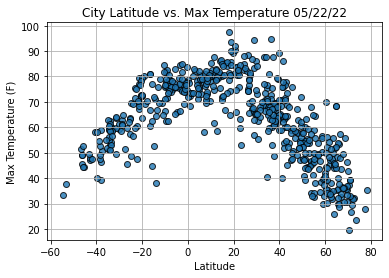

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

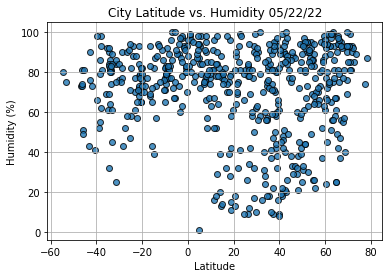

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

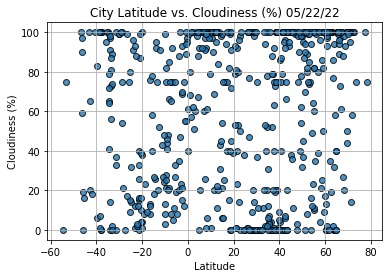

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

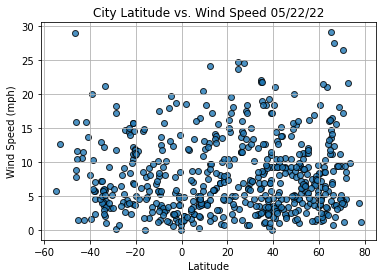

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Determine Correlations

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

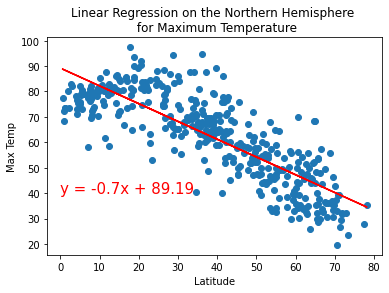

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,40))

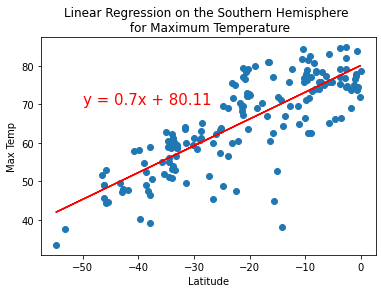

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,70))

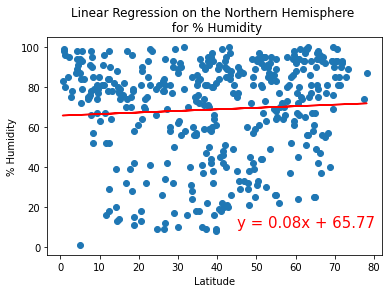

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

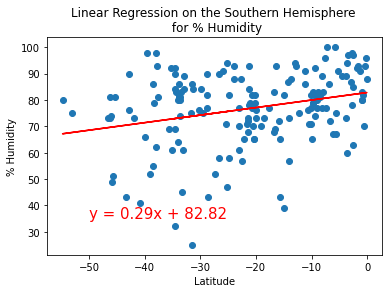

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,35))

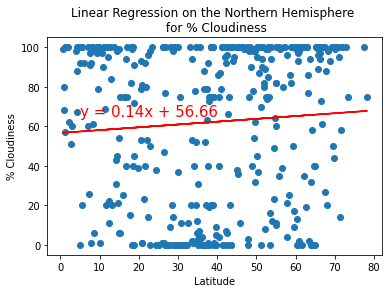

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(5,65))

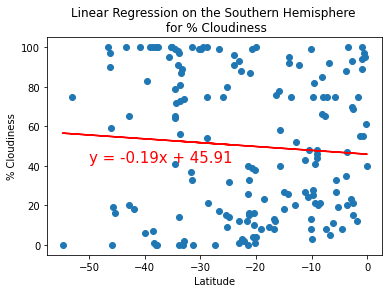

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,42))

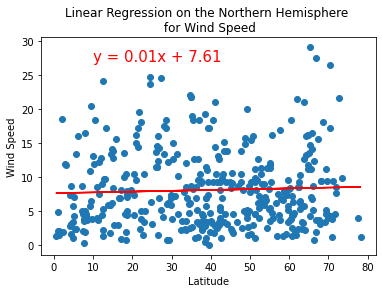

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,27))

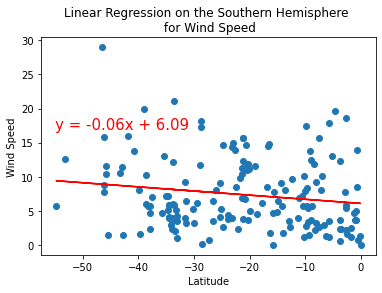

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,17))